# Probability distributions and Monte Carlo methods

This notebook introduces you to the basics of probability distributions and their application in Monte Carlo simulations. In the last notebook we learned how to think in terms of probabilities and worked with a basic example. Very often we do not have access to a dataset of all possible outcomes (sample space) that we can query to see how probable different outcomes are (or any set of outcomes, which we called an **event**). This can be because there are far too many outcomes to list them all or because such a detailed data is simply not available. Even if we had this data, querying it every time we wanted to find the probability of some event is not the a very efficient way to get the answer. Instead, we can find the probability associated with each outcome in the sample space once and save it for future reference. This is basically what a probability distribution is: a sort of lookup table that we refer to when we need to find the probability of some event.

In [1]:
import numpy as np
import pandas as pd
import itertools
import scipy
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize': (10, 8)})
sns.set_palette('muted')
sns.set_style('ticks')

For example, we saw that if we roll two dice and get the sum, the sample space looks like this:

![Two dice sample space](../images/two-dice.jpg)

And so we can see for example that $P(\text{sum} = 6) = 5/36$ (since all outcomes are equally likely, we can just count how many squares have a 5 and divide by the total). But if we need to look up these probabilities often, it may be easier to just find the probability distribution and refer to it when needed.

In [2]:
two_dice = pd.DataFrame(itertools.product(range(1, 7), range(1, 7)), columns = ['one', 'two'])
two_dice['roll_sum'] = two_dice.apply(sum, axis = 1)

prob_dist = two_dice['roll_sum'].value_counts(normalize = True, sort = False)
prob_dist

2     0.027778
3     0.055556
4     0.083333
5     0.111111
6     0.138889
7     0.166667
8     0.138889
9     0.111111
10    0.083333
11    0.055556
12    0.027778
Name: roll_sum, dtype: float64

We can display the above distribution using a barplot. Since the sample space is limited to integers between 2 and 12, this is called a **discrete distribution**.

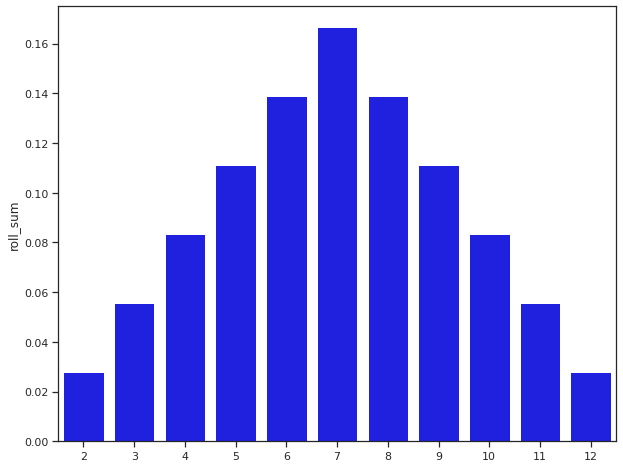

In [3]:
sns.barplot(x = prob_dist.index, y = prob_dist, color = 'blue');

Can we do even better than that? Maybe. We could try for example to encode the above distribution as a formula such as $P(k) = P(X = k) = -a|x - 7| + b$ with $x = \{2, 3, \cdots, 12\}$ and $a, b$ chosen so that $\sum_x P(x) = 1$. If we have such a formula, then to get $P(X = k)$ we just plug it into the function. No more querying the data. No more lookup tables.

Of course getting such a function for any distribution is not always easy to do, but for certain common scenarios such functions have been found and learning about them and how to use them is the topic of today.

## Discrete distributions

Discrete distributions are used to model the probability of events with discrete outcomes or states. Discrete distributions have a countable number of possible outcomes. The distribution measures the probability of each of these outcomes. We therefore call the distribution function the **probability mass function**.

The basic properties of discrete distributions are:

- The sum of the probabilities of all possible events must equal 1.
- The probability of an event is equal to the value of distribution at that point.
- All probabilities are strictly in the range 0-1.

### Discrete uniform distribution

This is the easiest of the distributions. Let's say you flip a fair coin. Then heads and tail have the same probability of happening, 50% each. In other words, the outcome of the coin flip follows a **uniform** distribution (equal probability), and because the options are limited to heads and tails it is **discrete**.

Another example is let's say you wake up in the morning and wonder what shirt to wear. If you have $20$ shirts and each is as likely to be selected as any other, then your choice of a shirt to wear follows a discrete uniform distribution and every short has a probability of $1/20$ to be selected.

### Bernoulli distribution

The coin toss example earlier can be generalized to **biased coins** using the Bernoulli distribution, which model trials with binary outcomes. For example, the flip of a coin can only result in two possible end states: heads or tails.

For an event with a binary outcome, $X \in \{0,1\}$ with probability $p$ of state 1, we can write the probability mass function for the Bernoulli distribution as:

$$P(X | p) = \bigg\{ 
\begin{matrix}
p &\text{if } X = 1\\
1 - p &\text{if } X = 0
\end{matrix}$$

Or as a one-liner: $P(X | p) = p^X + (1 - p)^{(1 - X)}$.

The Bernoulli distribution has mean $p$ and variance $p(1-p)$.

Let's explore the Bernoulli distribution. The code in the cell below computes the outcome of $1000$ Bernoulli trials with $p = 0.75$. The **theoretical and empirical** mean and variance for these trials are displayed. Execute this code and examine the results. How close are the empirical mean and variance to the theoretical mean and variance?

In [4]:
p = 0.75
sample_size = 10**6

bern_samples = np.random.binomial(1, p, sample_size) # draw samples from binomial distribution
bern_samples.shape

(1000000,)

In [5]:
print('theoretical mean p = %.6f, sample mean = %.6f' % (p, bern_samples.mean()))

theoretical mean p = 0.750000, sample mean = 0.750227


In [6]:
print('theoretical variance = %.3f, sample variance = %.3f' % (p * (1 - p), bern_samples.var()))

theoretical variance = 0.188, sample variance = 0.187


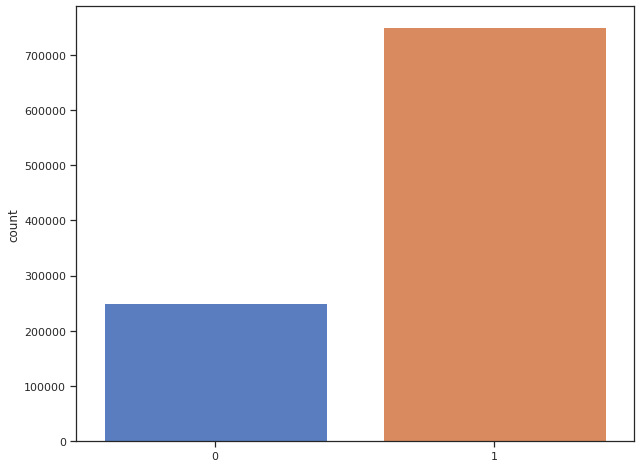

In [7]:
sns.countplot(x=bern_samples);

### Binomial distribution

If we perform $n$ independent Bernoulli trials with outcomes success and failure (or heads or tails, or 0 or 1), where $p$ is the probability of success, then the number of successes follows a binomial distribution.

$$P(X | n, p) = \binom{n}{X} p^X(1 - p)^{(n - X)}$$

Notice that the product includes the term $\binom{N}{X}$ since we must account for all possible combinations of outcomes from the trials. The theoretical mean and variance of the binomial distribution are $np$ and $np(1-p)$ respectively.

Let's try computing several binomial distributions, with probability of success $p = 0.75$, and letting $n$ take on the values $\{5, 25, 75 \}$. The code in the cell below computes $1000$ realizations of the binomial distribution for each value of $n$. The theoretical and sample means and variances are computed and printed for each case.

In [8]:
trials = np.array([5, 25, 75])
binom_samples = [np.random.binomial(n, p, sample_size) for n in trials]

binom_sample_means = [samples.mean() for samples in binom_samples]
binom_means = trials * p
pd.DataFrame({
    'theoretical mean': binom_means,
    'sample mean': binom_sample_means,
})

,theoretical mean,sample mean
0,3.75,3.748300
1,18.75,18.750090
2,56.25,56.252168


In [9]:
binom_sample_vars = [samples.var() for samples in binom_samples]
binom_vars = trials * p * (1 - p)
pd.DataFrame({
    'theoretical variance': binom_vars,
    'sample variance': binom_sample_vars
})

,theoretical variance,sample variance
0,0.9375,0.940739
1,4.6875,4.681517
2,14.0625,14.038393


In the cell below, create and execute the code to plot the simple histograms of the three binomial distributions in the `binom_samples` list. Do these distributions appear as you expect? 

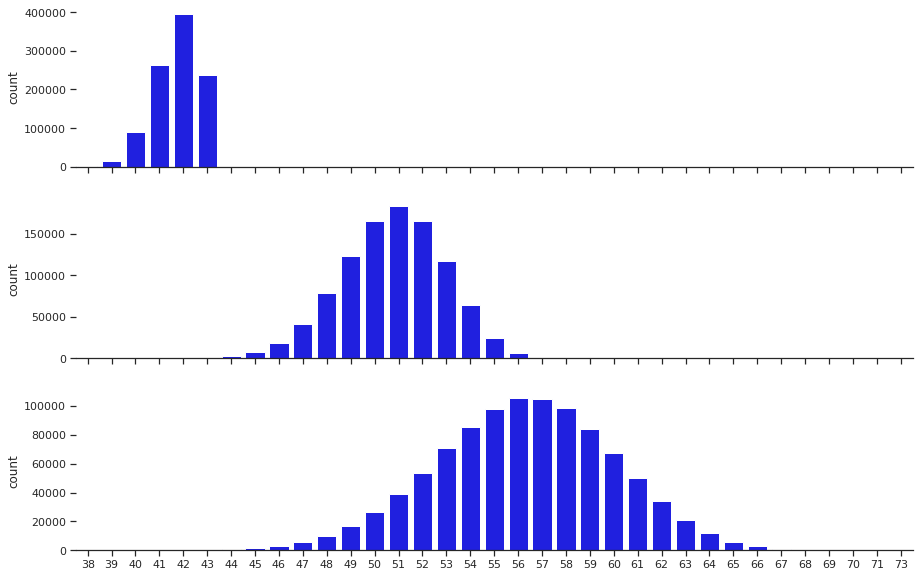

In [10]:
f, axes = plt.subplots(3, 1, sharex = True, figsize = (15, 10))
sns.despine(left = True)

sns.countplot(x=binom_samples[0], ax = axes[0], color = 'blue')
sns.countplot(x=binom_samples[1], ax = axes[1], color = 'blue')
sns.countplot(x=binom_samples[2], ax = axes[2], color = 'blue');

Notice that while the outcome of each Bernoulli trial is a discrete binary result, the result of multiple trials can take many discrete values. In fact, as $n$ becomes large the binomial distribution starts to look like a continuous distribution. In fact, the binomial distribution converges to the continuous **normal distribution** as $n \rightarrow \infty$. We will learn more about the normal distribution soon.

One last note: the binomial distribution works only with sequences **binary outcomes**, but there is a simple extension to the binomial distribution called the **multi-nomial distribution** which models sequences of events with a limited number of predefined outcomes (heads and tails, various colors, etc.).

### Poisson distribution

A common problem is modeling of the count of events occurring within some period of time. The Poisson distribution models the occurrence of events in a fixed interval of time. We say that the Poisson distribution models the probability of x **arrivals** within the time period.

In mathematical terms we write the Poisson distribution as:

$$ 
P(X\ |\ \lambda) = \frac{\lambda^X}{X!} \exp^{-\lambda}
$$

The theoretical mean and variance of the Poisson distribution are both equal to $\lambda$.

The code in the cell below computes $1000$ realizations of Poisson distributions with average arrival rates, $\lambda = \{ 1, 5, 25, 100\}$. The sample mean and variance for each distribution is then computed and printed along with the theoretical values.

In [11]:
lambdas = [1, 5, 25, 100]
poisson_samples = [np.random.poisson(l, size = 100) for l in lambdas]

poisson_sample_means = [samples.mean() for samples in poisson_samples]
poisson_sample_vars = [samples.var() for samples in poisson_samples]

pd.DataFrame({
    'theoretical mean / variance': lambdas,
    'sample mean': poisson_sample_means,
    'sample variance': poisson_sample_vars,
})

,theoretical mean / variance,sample mean,sample variance
0,1,0.91,0.8419
1,5,5.14,5.1204
2,25,25.79,21.0459
3,100,99.49,90.3899


## Continuous distributions

Continuous distributions are used to model variables with continuous valued random variables. Physical measurements, such as weight, length and temperature are examples of variables with continuous variables. 

Continuous distributions have an infinite number of possible outcomes. The distribution measures the probability for some range of values. We therefore call the distribution function the **probability density function**. This is in contrast to the **probability mass function** for discrete distributions. 

The probability of a value being in the range $(a, b)$ can be written as the integral of the probability density function over that range.

$$P(a < X < b) = \int_{a}^{b} P(X) dX$$

Notice that for a single exact value $a = b$, the probability is $0$.

Properties of continuous distributions are:

- The area under the distribution curve must be equal to 1, integrated over the range of possible values.
- The probability of a range of values of an event equals the **area** under the density curve over that range of values.
- Probabilities cannot have negative values.
- The probability of any single, exact value is 0.

### Continuous uniform distribution

A continuous uniform distribution has flat probability between limits $\{ a, b \}$ and $0$ outside that interval. The uniform distribution is used in a number of applications, including random selection of data and in simulation.

We can write the probability of the the uniform distribution as:

$$
P(a < X < b) = \Bigg\{ 
\begin{matrix}
\frac{1}{(b - a)} &\text{ if } a < X < b\\
0 &\text{ otherwise }
\end{matrix}
$$

The uniform distribution has mean $\frac{1}{2}(a + b)$ and variance $\frac{1}{2}(b - a)^2$.

The code in the cell below computes and plots the uniform distribution on the interval $\{ 0, 1 \}$, along with the kernel density plot.

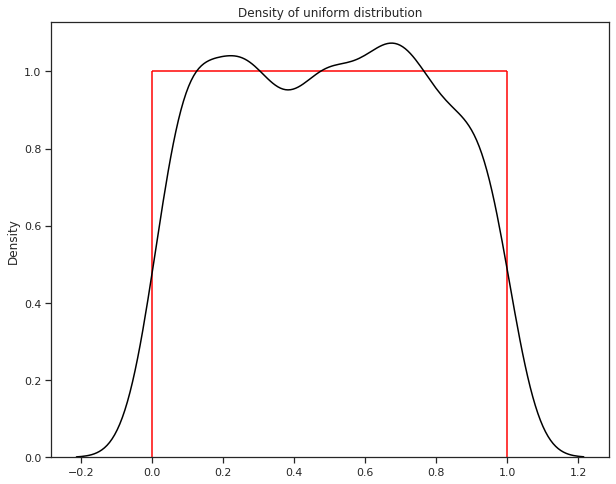

In [12]:
uniform_samples = np.random.uniform(0, 1, size = 1000)

# Plot the distribution of samples
sns.kdeplot(uniform_samples, color = 'black')

plt.vlines(0, 0, 1, colors = 'red')
plt.hlines(1, 0, 1, colors = 'red')
plt.vlines(1, 0, 1, colors = 'red')
plt.title('Density of uniform distribution')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


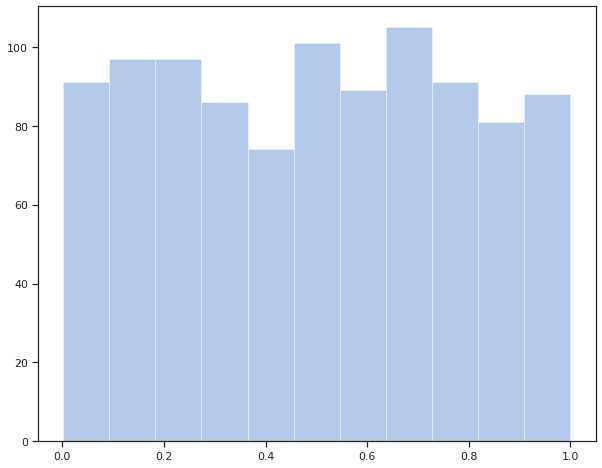

In [13]:
sns.distplot(x=uniform_samples, kde = False);

Let's try simulating some uniform distributions. The code in the cell below creates and plots the histogram uniform distributions with $\{100, 1000, 10000, 100000\}$ realizations, along with the theoretical density. Execute this code and examine the results. Notice how close each histogram is to the theoretical density. 

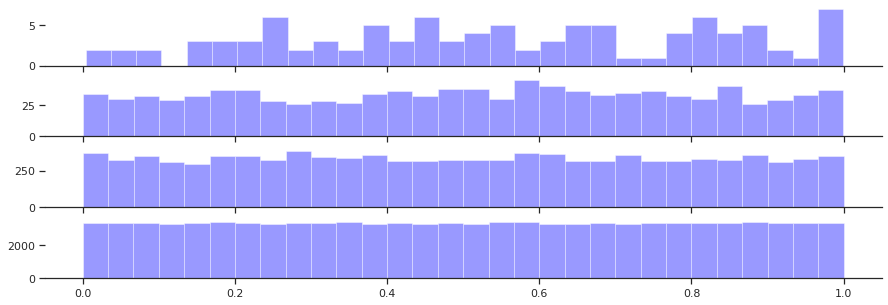

In [14]:
f, axes = plt.subplots(4, sharex = True, figsize = (15, 5))
sns.despine(left = True)

trials = [100, 1000, 10000, 100000]
nbins = 30 # how many bins to use for each histogram
for i in range(len(trials)):
    sns.distplot(x=np.random.uniform(0, 1, trials[i]), ax = axes[i], color = 'blue', kde = False, bins = nbins)

One fun application of probabilites the unfiorm distribution is [Bouffon's needle problem](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem). Solving it requires only basic understanding of calculus and multivariate calculus. The results show a surprising way that $\pi$ can be approximated!

### Normal Distribution

The normal distribution is one of the most widely used probability distributions. Any case where values are the result of product of a large number of processes will converge to a normal distribution. Many physical processes produce measurement values which are well modeled by a normal distribution or log-normal distribution.

For a normal distribution we can write the density function as:

$$P(X) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\frac{-(X - \mu)^2}{2 \sigma^2}}$$

The parameters are $\mu$ and $\sigma$ and happen to also be the mean and standard deviations of the theoretical distribution respectively. In other words, the distribution is defined by its center (mean) and scale (standard deviation). The normal distribution has other important properties. For example, around 68% of the data is within 1 standard deviation from the mean, and around 95% is within 2 standard deviations from the mean as can be seen below:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png" alt="Normal distribution">

Source: [Wikipedia](https://en.wikipedia.org/wiki/Probability_density_function)

The code in the cell below computes and plots the normal distribution for four different combinations of location and scale, as shown in the table:

| $\mu$ | $\sigma$ |
|:-----:|:-------:|
| 0     | 1       |
| 5     | 1       |
| 0     | 0.1     |
| 4     | 4       |

By the way, the normal distribution with $\mu = 0$ and $\sigma = 1$ is a little special and we call it the **standard normal distribution**. In fact, any normally-distributed can be generated by first drawing a sample from the standard normal distribution and adding $\mu$ to it and multiplying it by $\sigma$.

0 [-1.24749512 -0.96422137 -1.35288106 ...  0.27034678  1.42444743
  1.3340115 ]
1 [6.5467896  5.02684176 4.72064052 ... 5.57347124 6.12420085 6.18267215]
2 [ 0.12719976  0.09039822  0.37747183 ... -0.0657849  -0.09487824
 -0.07580293]
3 [5.09384314 2.12642981 6.4800189  ... 4.47208858 4.4561603  3.81498752]


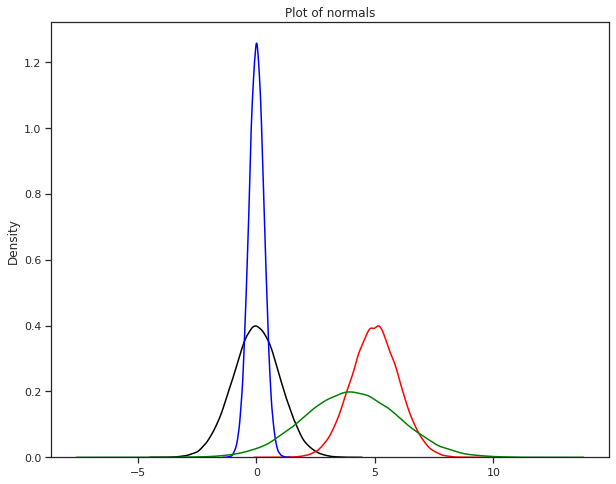

In [15]:
n = 100000

norm_params = [ # (mean, var)
    (0, 1),
    (5, 1),
    (0, .1),
    (4, 4)
]

norm_samples = [np.random.normal(mean, np.sqrt(var), n)
                for mean, var in norm_params]

plt.title('Plot of normals')
colors = ('black', 'red', 'blue', 'green')
for i, samples in enumerate(norm_samples):
    print(i, samples)
    sns.kdeplot(x=samples, color = colors[i], label = 'N(%.1f, %.1f)' % norm_params[i])

#plt.xlim(-3, 9);

We have now explored the basic properties of the normal distribution. The relationship between the the quantiles and the number of $\sigma$s to the left or right of center is another important property of the normal distribution. An understanding of this relationship provides some intuition about the likelihood of events under the normal distribution.

The code in the cell below plots a histogram of 100000 realizations of a standard normal distribution ($\mu = 0.0,\ \sigma = 1$). Vertical lines are plotted at $\sigma = \{-3, -2, -1,\ 0,\ 1,\ 2,\ 3\}$. Execute this code and examine the results. Notice that events become quite unlikely as $\sigma$ becomes large.

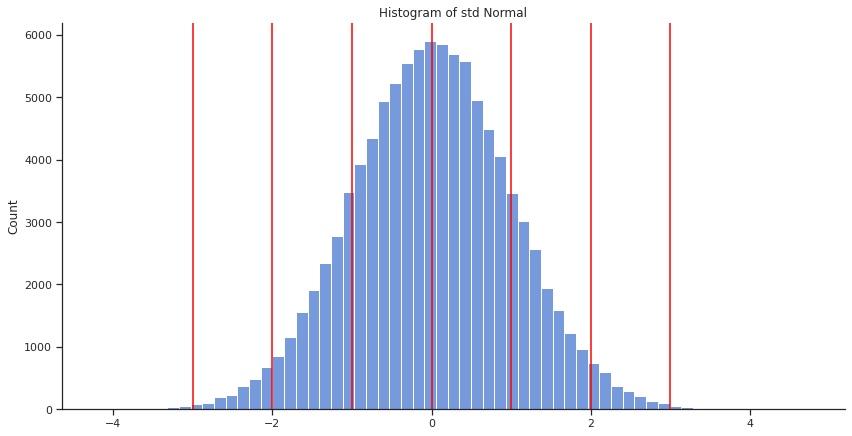

In [16]:
n = 100000

std_norm_samples = np.random.standard_normal(n)

#sns.distplot(x=std_norm_samples, bins = 61)
sns.displot(x=std_norm_samples, bins = 61, height=6, aspect=2.0)
plt.title('Histogram of std Normal')
for x in range(-3, 4):
    plt.axvline(x, 0, color = 'red');
# Draw lines at each standard deviation from the mean
#plt.vlines(range(-3, 4), 0, scipy.stats.norm.pdf(range(-3, 4)), color = 'red');

In [17]:
std_thresholds = range(-3, 4)
quantiles = scipy.stats.norm.cdf(std_thresholds, scale = 1, loc = 0)
pd.DataFrame({
    'std deviations': std_thresholds,
    'quantile': quantiles,
})

,std deviations,quantile
0,-3,0.001350
1,-2,0.022750
2,-1,0.158655
3,0,0.500000
4,1,0.841345
5,2,0.977250
6,3,0.998650


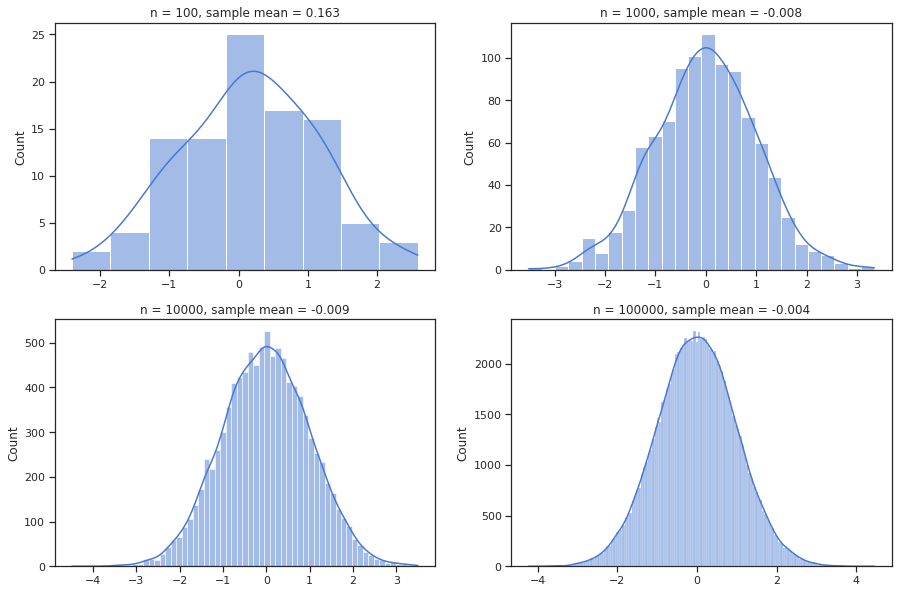

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10));
ax = ax.flatten()
#g = sns.FacetGrid(tips, col="time", row="sex")
for i, n in enumerate([100, 1000, 10000, 100000]):
    std_norm_samples = np.random.normal(loc = 0.0, scale = 1.0, size = n)
    title = 'n = %d, sample mean = %.3f' % (n, std_norm_samples.mean())
    sns.histplot(x=std_norm_samples, kde=True, ax=ax[i]);
    ax[i].set_title(title);
#    plt.subplot(2, 2, i+1, title = title)
#    sns.displot(x=std_norm_samples)

### Exercise

By convention, we call the function $F(x) = P(X \le x)$ the CDF (cumulative density function) of the random variable $X$, and the function $f(x) = P(X = x)$ the PDF (probability density function) of it. As we already mentioned, $P(X = x) = 0$ for any specific X = x, so the PDF of a random variable doesn't really have a good interpretation. Just think of it as the function (PDF), whose integral corresponds to another function (CDF) that for any value of $x$ gives you $P(X <= x)$. The CDF can be interpreted directly as a probability. In the `scipy` package we can access both of these functions for different distributions, for example `scipy.stats.norm.pdf` and `scipy.stats.norm.cdf` are the PDF and CDF of the normal distribution.

Let's say we have a normally distributed random variable $X$, defined (as we will see shortly) by its mean $\mu$ and standard deviation $\sigma$. The notation we use sometimes is $X \sim N(\mu, \sigma)$. Assuming $\mu = 4$ and $\sigma = 7$ let's first generate 10000 random points from this distribution and plot it.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


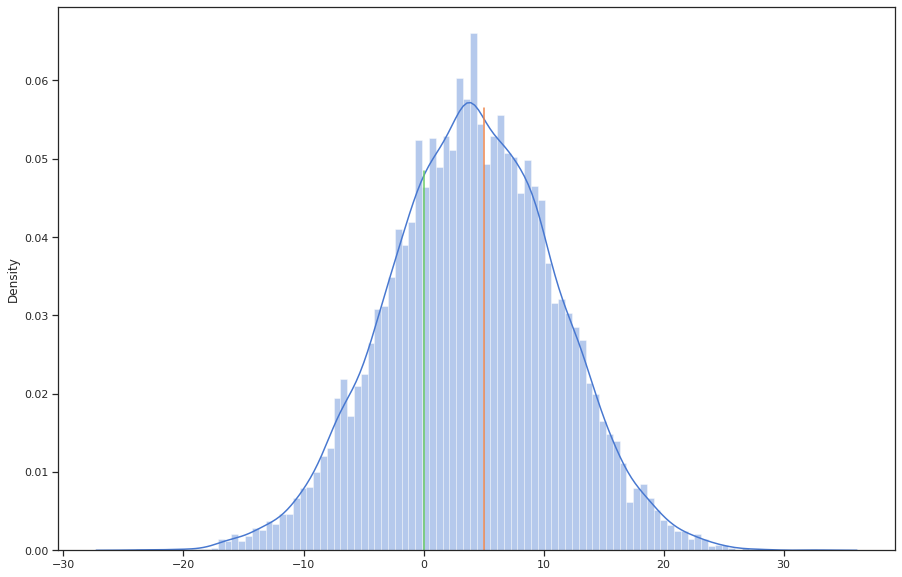

In [19]:
fig, ax = plt.subplots(figsize = (15, 10));
mu, sigma = 4, 7
sns.distplot(x=np.random.normal(loc = mu, scale = sigma, size = 10000), bins = 100);
plt.plot([5, 5], [0, scipy.stats.norm.pdf(5, loc = mu, scale = sigma)]);
plt.plot([0, 0], [0, scipy.stats.norm.pdf(0, loc = mu, scale = sigma)]);

Find the following probabilities (HINT: use `scipy.stats.norm.cdf`):

- $P(X < 5)$ (area to the left of the orange line)
- $P(X > 5)$ (area to the right of the orange line)
- $P(0 < X < 5)$ (area between the green and orange line)

In [20]:
## your code goes here
print('P(X < 5) = ' + str(scipy.stats.norm.cdf(5.0, loc=mu, scale=sigma)))
print('P(X < 5) = ' + str(1.0 - scipy.stats.norm.cdf(5.0, loc=mu, scale=sigma)))
print('P(X < 5) = ' + str(scipy.stats.norm.cdf(5.0, loc=mu, scale=sigma) - scipy.stats.norm.cdf(0.0, loc=mu, scale=sigma)))

P(X < 5) = 0.5567984968164682
P(X < 5) = 0.4432015031835318
P(X < 5) = 0.2729439137177919


Let's see if we can show the relationship between a CDF and a PDF. Since at any point $x$ on the $x$ axis above, the PDF shows the hight of the above density plot and the CDF shows the area under it, let's show that we can estimate the CDF by numerically integrating the PDF. This is similar to approximating the area under the curve using the histogram in the above density plot. In calculus, this is called a **Riemann sum**.

In [21]:
delta_x = 0.001
lower_limit, upper_limit = 0, 5
interval_range = np.arange(lower_limit, upper_limit, delta_x)
sum([scipy.stats.norm.pdf(i, loc = mu, scale = sigma) * delta_x for i in interval_range])

0.2729399101351119

- Verify that the number we obtain above is an approximation for $P(0 < X < 5)$.

In [22]:
## your code goes here
samples = np.random.normal(loc = mu, scale = sigma, size = 10000)
print('P(0 < X < 5) = ' + str(len(samples[np.where((samples > 0.0) & (samples < 5.0))])/len(samples)))

P(0 < X < 5) = 0.2709


- We can also ask the question the other way around. For example, earlier we asked what is $P(X < 3)$. Now we want to know at what value of $x$ we have $P(X < x) = 0.4$. HINT: This can be answered using `scipy.stats.norm.ppf`, which is the inverse function to `scipy.stats.norm.cdf`.

In [23]:
## your code goes here
scipy.stats.norm.ppf(0.4, loc=mu, scale=sigma)

2.226570278049402

We mentioned earlier that when data is normally distributed 68% of the data is within 1 standard deviation and 95% is within two standard deviations from the mean. Verify these claims computationally on 1000 data points generated from the standard normal distribution ($\mu = 0$ and $\sigma = 1$).

In [24]:
## your code goes here
n_samps = 1000
std_normal_samples = np.sort(np.random.normal(size=n_samps))
#print(std_normal_samples)
for p, quantiles in zip([68, 95], [(.16, 0.84), (0.025, 0.975)]):
    lower = int(quantiles[0] * n_samps)
    upper = int(quantiles[1] * n_samps)
    prob = len(std_normal_samples[lower:upper])/n_samps
    print('For ' + str(p) + ' percent, probability = ' + str(prob))   

For 68 percent, probability = 0.68
For 95 percent, probability = 0.95


### End of exercise

Similarly to the binomial distribution, it can be shown that as $\lambda$ increases the Poisson distribution approaches a continuous normal distribution. Notice how the poisson distributions below look more and more bell-curved as $\lambda$ increases.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


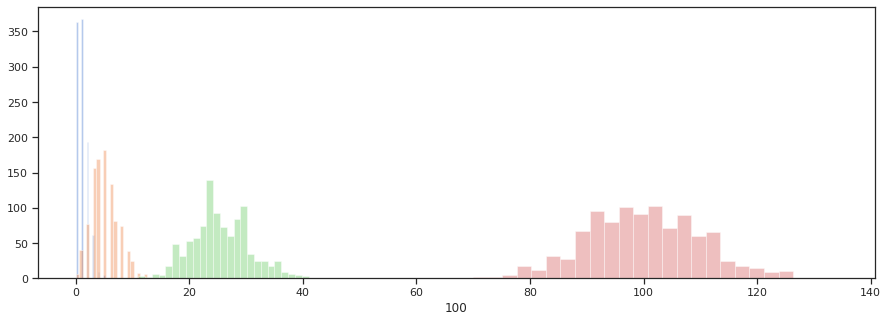

In [25]:
plt.figure(figsize = (15, 5))

lambdas = [1, 5, 25, 100]
poisson_samples = np.array([np.random.poisson(l, 1000) for l in lambdas]).transpose()
poisson_samples = pd.DataFrame(poisson_samples, columns = [str(l) for l in lambdas])
for l in lambdas:
    sns.distplot(poisson_samples[str(l)], bins = 25, kde = False);

The following plot shows how a poisson and normal distribution. 

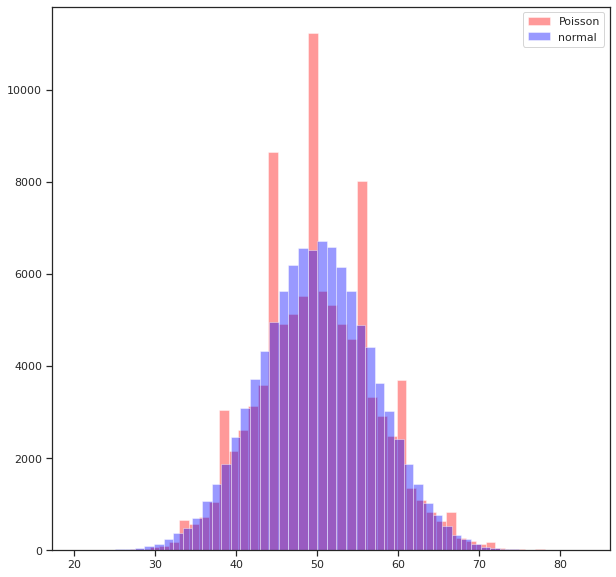

In [26]:
plt.figure(figsize = (10, 10))

lamb = 50
mu = lamb
sigma = lamb**0.5

num_samples = 100000
norm_samples = np.random.normal(loc = mu, scale = sigma, size = num_samples)
poisson_samples = np.random.poisson(lam = lamb, size = num_samples)
sns.distplot(poisson_samples, kde = False, color = "red")
sns.distplot(norm_samples, kde = False, color = "blue")
plt.legend(labels = ['Poisson', 'normal']);

To approximate the Poisson distribution with a normal distribution we need to apply the **continuity correction**:

$$P(50 <= X <= 60 | X\sim\text{Poisson}(\lambda)) \approx P(49.5 < X < 60.5 | X\sim\text{Normal}(\lambda, \lambda))$$

In [27]:
lamb = 55
mu = lamb
sigma = lamb**0.5

normal_apprx = scipy.stats.norm.cdf(60.5, loc = mu, scale = sigma) - scipy.stats.norm.cdf(49.5, loc = mu, scale = sigma)
poisson_prob = scipy.stats.poisson.cdf(60, mu = lamb) - scipy.stats.poisson.cdf(50, mu = lamb)
print("Normal approximation = {}, exact value = {}".format(normal_apprx, poisson_prob))

Normal approximation = 0.5416823058669205, exact value = 0.4971895099817797


### Log-Normal distribution

The normal distribution is defined for continuous random variables in the range $-\infty \le x \le \infty$. However, many quantities one can measure are only defined in a range $0 \lt x \le \infty$. Examples include, price, weight, length, and volume. 



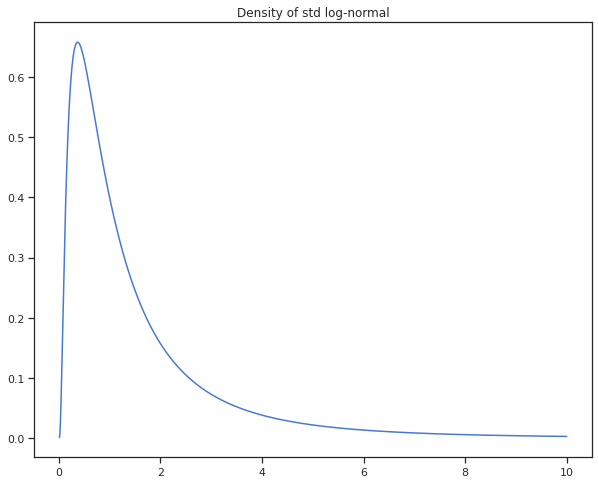

In [28]:
x = np.linspace(.01, 10, num = 10000)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
sns.lineplot(x=x, y=log_normal_pdf)
plt.title('Density of std log-normal');

The log-normal distribution is on log scale. You can transform the log-normal distribution to a normal distribution. In the cell below create and execute the code to **natural log transform the x variable** and plot the density.

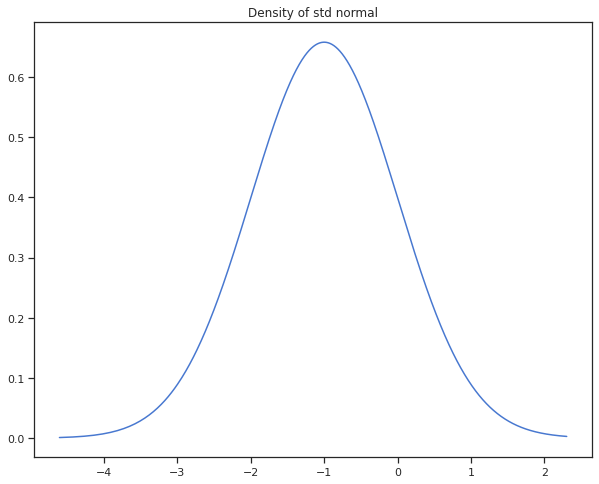

In [29]:
x = np.linspace(.01, 10, num = 10000)
x_log = np.log(x)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
sns.lineplot(x=x_log, y=log_normal_pdf)
plt.title('Density of std normal');

**Note:** For exploration and evaluation if the distribution is log-normal, it is more appropriate to transform the graph to log scale on x-axis than manipulating the data:

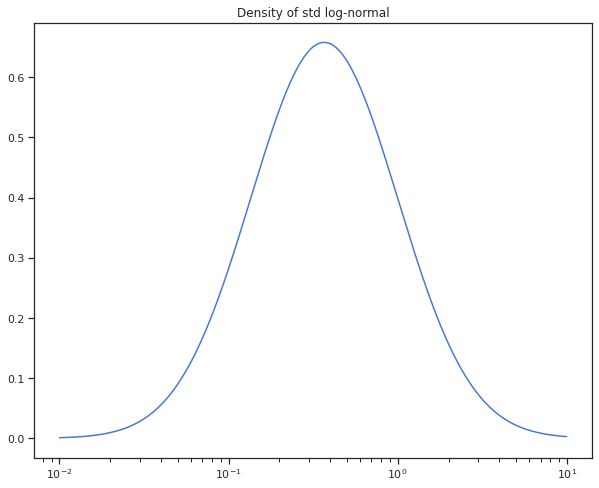

In [30]:
x = np.linspace(.01, 10, num = 10000)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
sns.lineplot(x=x, y=log_normal_pdf)
plt.title('Density of std log-normal')
plt.xscale('log')

### Student t-distribution

The student t-distribution is often just referred to as the t-distribution. This distribution is of importance in statistics since the error in the difference of the means of normally distributed variables are t-distributed. 

The t-distribution is defined in a somewhat different way from the other distributions we have looked at. It has one parameter, the degrees of freedom, denoted as $\nu$. The derivation of the density function for the t-distribution is a bit complicated and leads to the following, rather complex result:

$$
P(X | \nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\sqrt{\nu \pi} \Gamma(\frac{\nu}{2})} \bigg(1 + \frac{X^2}{\nu} \bigg)^{- \frac{\nu + 1}{2}}\\
$$

where $\Gamma(X)$ is called the Gamma function.

Despite the complex density formula, you can gain a fair feel for the behavior of the t-distribution by plotting it for several values of $\nu$ and comparing it to the normal distribution. The code in the cell below plots the density function for the t-distribution for degrees of freedom, $\nu = \{1, 2, 3, \infty \}$, along with a standard normal distribution. Execute this code and examine the results. Notice how the t-distribution is wider with heavier tails than the normal distribution. As $\nu \rightarrow \infty$ the t-distribution becomes identical to the normal distribution. 

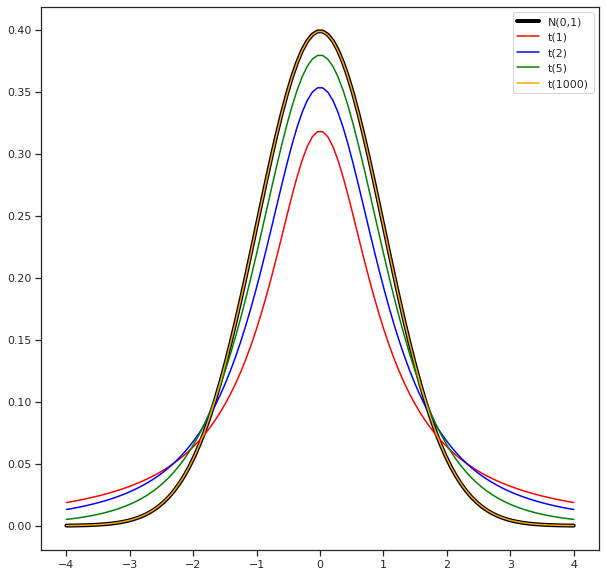

In [31]:
plt.figure(figsize = (10, 10))
x = np.linspace(-4, 4, num = 100)

sns.lineplot(x=x, y=scipy.stats.norm.pdf(x), color = 'black', linewidth = 4, label = 'N(0,1)')

for df, color in zip([1, 2, 5, 1000], ['red', 'blue', 'green', 'orange']):  
    sns.lineplot(x=x, y=scipy.stats.t.pdf(x, df), label = 't(%d)' % df, color = color);

## Exponential distribution

The gamma distributions are a complex family of continuous probability distributions. All distributions in the gamma family are only defined for $0 <= X <= \infty$.

We will look at one special cases of particular interest, the exponential distribution. The exponential distribution is used to model waiting times between events. We can write the formula for the probability density function of the exponential distribution as:

$$P(x | \lambda) = \bigg\{ 
\begin{matrix}
\lambda \exp^{- \lambda X} &\text{ if } X \ge 0\\
0 &\text{ if } X \lt 0
\end{matrix}
$$

with an expected value of $\lambda^{-1}$ and variance of $\lambda^{-2}$. Note that $\lambda$ is called the average time between events.

To get a feel for the exponential distribution, let's plot it for arrival rates of $\{0.5, 1.0, 2.0  \}$ or $\lambda = \{ 2.0, 1.0, 0.5 \}$.

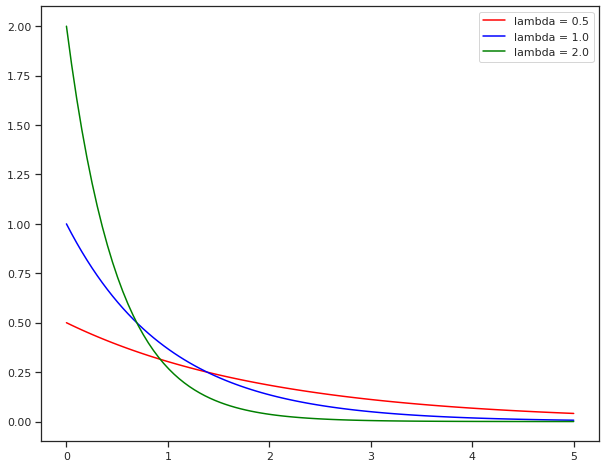

In [32]:
x = np.linspace(0, 5, num = 100)
lambdas = [.5, 1., 2.]
colors = ['red', 'blue', 'green']

for i in range(len(lambdas)):
    sns.lineplot(x=x, y=scipy.stats.expon.pdf(x, loc = 0, scale = 1/lambdas[i]),
             color = colors[i], label = "lambda = {}".format(lambdas[i]))

## Simulations

<img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif" alt="Monte Carlo">

Source: [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method)

In [33]:
sizes = [10**i for i in range(2, 8)]
for n in sizes:
    X = np.random.uniform(size = n)
    Y = np.random.uniform(size = n)
    pi_approx = np.mean(X**2 + Y**2 < 1) * 4
    print("We approximate pi to {} using n = {}".format(pi_approx, n))

We approximate pi to 3.04 using n = 100
We approximate pi to 3.192 using n = 1000
We approximate pi to 3.1592 using n = 10000
We approximate pi to 3.14088 using n = 100000
We approximate pi to 3.140168 using n = 1000000
We approximate pi to 3.1410396 using n = 10000000


Simulation enables data scientists to study the stochastic behavior of processes with complex probability distributions. Simple processes might be approximated by a known, or 'named' distribution. In these simple cases, it might even be possible to derive analytical results. However, many real-world processes have complex behavior, resulting in complex distributions of output values. In these cases, simulation is a practical approach to understanding these processes. 

As cheap computational power has become ubiquitous, simulation has become a widely used technique in the data scientist's tool box. Simulations compute a large number of cases, or realizations, of the process being studied. The final or posterior distribution of the process being simulated is comprised of these realizations. The computing cost of each realization must be low in any practical simulation. 

Data scientists use simulation for a number of purposes:

- Simulation is used to test models. If data simulated from the model do not resemble the original data, something is likely wrong with the model.
- Simulation is used to understand processes with complex distributions. In these cases, simulation provides a powerful and flexible computational technique to understand this behavior.  

In this notebook you will create a simulation of a process with a complex distribution. 

Creating, testing and debugging simulation software can be tricky. Some of the techniques which can make your life easier are the same as you should use when developing any analytics software, or even software in general. These techniques include:

- Build your simulation as a series of small, easily tested chunks. In practice, this means you will build your simulation by creating and testing a set of small functions that comprise the overall model.
- Test each small functional unit individually. These tests should include at least testing some typical cases, as well as boundary or extreme cases. Sensible behavior with extreme or limiting cases is a requirement for a stable simulation. Both tabular and graphical output can be useful for evaluating tests.
- Test your overall simulation each time you add a new functional component. This processes ensures that all the pieces work together. 
- Simulations are inherently stochastic. If you want to create identical numerical results, say for automated testing, set a seed before you begin tests. In this notebook no seed is set so you can experience the stochastic nature of the simulation. 

### Exercise

Let's say that families keep having children until they have a girl, at which point they stop. The probability of having a girl and the probability of having a boy is 50 percent each.

1. What is the probability that a family has 3 boys and a girl?
1. What is the probability that a family has **at most** 3 boys and a girl?
1. What is the percentage of boys in the **overall population** (not per family)?
1. What is the average percentage of boys **per family**?

The type of distribution we are describing here is a **hyper-geometric distribution**: The hyper-geometric distribution is a discrete distribution that models the number of Bernoulli trials until a successful event. So $P(X = k|p) = (1-p)^{k-1}p$. Although it's easy to do the math in this case, we can also just use `scipy.stats.geom.pmf(k, p)` to get the answer.

- Find the answer to (1) using `scipy.stats.geom.pmf`.

In [34]:
## your code goes here
## Probabiity of one failure (girl born) in 4 trials, the number of boys = trials - 1
p=0.5
scipy.stats.geom.pmf(4, p)

0.0625

- Find the answer to (2) using `scipy.stats.geom.pmf(k, p)`. Compare you answer to what you get if you use `scipy.stats.geom.cdf(k, p)` instead (the cumulative distribution).

In [35]:
## your code goes here
## Use a brute force approach to accumualte the probability
prob = 0
for ii in range(4):
    prob += scipy.stats.geom.pmf(ii, p = 0.5)
    
print(prob)

0.875


In [36]:
## your code goes here
## or, the simple way with the CDF
scipy.stats.geom.cdf(3, p)

0.875

Even though the geometric distribution and the binomial distributions are both based on Bernoulli trials, they capture different things: In the binomial distribution, the number of trials $n$ is fixed, as is the probability of success $p$, and the random variable $X$ is the number of successful trials. In the geometric distribution, the number of successful trials is just 1, and the random variable $X$ is the number of total trials, which is also the number of failed trials plus one, since the last trial is a success.

- Approximate the answers to (1) and (2) by generating random variables from the geometric distribution using `np.random.geometric(p, size)`. Note that `size` is just the number of random variables we wish to generate.

In [37]:
geom_rvs = np.random.geometric(p = 0.50, size = 10000)
print("approximate probabilty for (1): prob = {:1.3f}".format(np.mean(geom_rvs == 4)))
print("approximate probabilty for (2): prob = {:1.3f}".format(np.mean(geom_rvs < 4)))

approximate probabilty for (1): prob = 0.068
approximate probabilty for (2): prob = 0.869


- Now approximate the answers to (3) using the sample you generated above.

In [38]:
## Your code goes here
num_boys = (geom_rvs-1).sum() # subtract 1 to remove the 1 girl each family has
num_tot = geom_rvs.sum()
print("approximate percent of boys in population: {:1.2f}".format(num_boys/num_tot))

approximate percent of boys in population: 0.50


- Now approximate the answers to (4) using the sample you generated above.

In [39]:
## your code goes here
pct_boys = ((geom_rvs-1) / geom_rvs).mean()
print("approximate percent of boys per family: {:1.2f}".format(pct_boys))

approximate percent of boys per family: 0.31


### End of exercise

So we looked at examples of specific probability distributions which are there to model real-life discrete or continuous events. We then saw how we can draw random numbers from these distributions to generate samples and run calculations on them, which is especially handy when what we're trying to estimate cannot be *analytically* derived (or not easily at least). The simulation examples we saw above are a good warmup for the assignment.

# Milestone

In this assignment, we implement a simulation for estimating profit made at a sandwich shop. Not suprisingly, the sandwich shop earns money every time a customer buys a sandwich. However, the inputs to the sandwich cost money. The daily profit is the amount customers pay for the sandwiches minus the cost of the inputs. Unlike the simulations we saw in class, this time we need to set up simulations for multiple dependent events, so we worked out some of the solution and leave you to fill in the gaps as pointed out in the assignment.

## Problem statement

To keep things simple, we make the following assumptions:

- The shop bakes its own bread, and the bread must be used on the day it is made. The customers can select one of three types of bread, white, wheat, and multigrain.
- The number of each type of bread baked in the sandwich shop is fixed. Presumably the shop manager has a plan for the day, and the bread is baked in advance of the customer arrivals.
- The probability that each customer chooses a particular type of bread is fixed and known. There probabilities are 50% for white bread, 25% for wheat and 25% for multigrain. 
- If a customer's choice of bread is not available the customer leaves the shop without buying a sandwich.
- The only perishable input which must be discarded at the end of each day is the bread. 
- Customers do NOT stop coming to the sandwich shop as a result of not finding their bread choice. In other words, we will not consider the possiblity of attrition.

In order to develop an overall profitability model we must run through the following steps:

1. Simulate the number of customer arrivals on a given day.
1. Simulate supply and demand for each bread. Supply will be deterministic, but demand will depend on the number of customers who come on a given day and which type of bread they choose. 
1. Once we have supply and demand, we can finally simulate profit. 

Running the above simulation over many iterations will give us a distribution for daily profit. We can use this distribution to answer all sorts of questions about profitability. To help you better visualize the process, here's a flowchart that you can refer back to as you work on the assignment. 

![flow chart](../images/sandwich-shop.jpg)

## Setting up the simulation

We begin by writing a function called `daily_demand`, which will simulate how many of each bread customers will demand given the number of customers who walked in on a given day. To do so, we use the **multi-nomial distribution**, an extension of the binomial distribution that allows more than just two (binary) outcomes. We have 3 choices of bread in this case, each having a probability $p_i$ of occuring, where $p_i$ is fixed. How did we know to use the the multi-nomial distribution and not some other distribution? The answer to that is we made an educated guess based on (1) domain knowledge, and (2) knowledge of probability distributions. Of course we may be wrong about our choice, so when we're unsure it may be a good idea to also test other distributions, but we will stick with the multi-nomial distribution.

In [1]:
import numpy as np
import pandas as pd
import itertools
import scipy
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize': (10, 8)})
sns.set_palette('muted')
sns.set_style('ticks')

In [2]:
bread_types = ['white', 'wheat', 'multigrain']
bread_probs = [.50, .25, .25]
dict(keys=bread_types)

def daily_demand(num_customers, bread_probs = bread_probs):
    return np.random.multinomial(n = num_customers, pvals = bread_probs)

daily_demand(num_customers = 100)

array([43, 24, 33])

In [3]:
[bread * prob for bread, prob in zip([1, 1, 1], bread_probs)]

[0.5, 0.25, 0.25]

Each time you rerun `daily_demand` you get a different distribution of bread types, but notice that the proportions of white, wheat and muligrain remain approximately 2, 1, 1, respectively.

- Write a function called `daily_supply` with two inputs: `num_breads` and `bread_probs`. The function should output the number of each type of bread that the shop will make on any given day. This is determined by just multiplying `num_breads` with `bread_probs`, so as long as `num_breads` is fixed, the function returns the same output. <span style="color:red" float:right>[2 point]</span>

In [4]:
def daily_supply(num_breads, bread_probs=bread_probs):
    return [num_breads * prob for prob in bread_probs]

In [5]:
daily_supply(num_breads=100)

[50.0, 25.0, 25.0]

As stated in the assumptions, the number of breads we make will be fixed, but we let the number of customers arriving every day vary by simulating it using a **Poisson distribution**. Often arrival rates, $k$, per time interval are modeled as a Poisson process with rate or intensity $\lambda$, which can be written:

$$P(k \text{ arrivals } | \lambda \text{ average arrival rate}) = \frac{\lambda^k\ e^{-\lambda}}{k!}$$

Note that if the arrival rate is fairly high, the difference between a Poisson distribution and an appropriate normal distribution will be minimal. So we could also use a normal distribution and apply the continuity correction, as shown in the lecture. But we will stick with the Poisson distribution.

- Write a function called `sim_demand` with two inputs: `arrival_rate` and `num_days`. The function should return a `DataFrame` with `num_days` rows and three columns: `white`, `wheat` and `multigrain`. For each row, we first simulate the number of arrivals using a Poisson distribution with mean equal to `arrival_rate` and then use the `daily_demand` function to simulate daily demand for each type of bread which populate the columns. Refer to the flow chart to see a sample of the output. <span style="color:red" float:right>[5 point]</span>

In [6]:
def sim_demand(arrival_rate, num_days):
    arrivals = np.random.poisson(lam = arrival_rate, size = num_days) # compute realizations of arrivals
    demand = pd.DataFrame(columns = bread_types)
    # print(demand)

    for i, a in enumerate(arrivals):
        # print(i, a)
        demand.loc[i, :] = daily_demand(num_customers = a)
    
    return demand

sim_demand(arrival_rate = 100, num_days = 10).head() # run this to test your function

,white,wheat,multigrain
0,51,23,13
1,58,27,26
2,40,28,21
3,57,22,21
4,47,29,30


- Write a function called `sim_supply` with two inputs: `num_breads`, and `num_days`. Just like the previous function, this function should also return a `DataFrame` with `num_days` rows and three columns: `white`, `wheat` and `multigrain`. For each row, we pass `num_breads` to `daily_supply` to get the number of each bread type we make, which we use to populate the columns. Since we are fixing `num_breads = 100`, we should see the same set of values at each row. Refer to the flow chart to see a sample of the output. <span style="color:red" float:right>[5 point]</span>

In [7]:
## your code goes here
def sim_supply(num_days, num_breads=100):
    df = pd.DataFrame(columns=bread_types)
    
    for i in range(num_days):
        df.loc[i] = daily_supply(num_breads=num_breads)
        
    return df  


sim_supply(num_breads = 100, num_days = 10).head() # run this to test your function

,white,wheat,multigrain
0,50.0,25.0,25.0
1,50.0,25.0,25.0
2,50.0,25.0,25.0
3,50.0,25.0,25.0
4,50.0,25.0,25.0


In [8]:
sim_sup = sim_supply(num_breads = 100, num_days = 10)
sim_dem = sim_demand(arrival_rate = 100, num_days = 10)

In [9]:
test = sim_sup - sim_dem
test

,white,wheat,multigrain
0,-4.0,-1.0,4.0
1,5.0,-1.0,0.0
2,-3.0,-6.0,0.0
3,-13.0,4.0,-2.0
4,-7.0,9.0,2.0
5,3.0,1.0,5.0
6,2.0,3.0,3.0
7,-2.0,-1.0,1.0
8,7.0,-5.0,6.0
9,4.0,-4.0,3.0


You now have almost all the pieces in place to create the complete simulation of the distribution of profitability of the sandwich shop. The only missing piece is to compute the total profit based on the number of sandwiches sold and the cost of the bread baked.

We can now calculate how much profit each bread type is generating over a certain number of days. To do so, we first simulate supply and demand for each of those days, we then calculate the revenue from all the bread we sold that day and subtract the cost of making bread that day. Keep in mind that not all the bread we made is sold, so left-overs contribute to the cost, but not to the revenue!

- Complete the `sim_profit` function by calculating profit by type of bread. The function returns **three** `DataFrame` objects, containing the supply, demand, and profit for each bread type each day. Refer to the above flowchart if needed. <span style="color:red" float:right>[15 point]</span>

In [10]:
bread_types = ['white', 'wheat', 'multigrain']
bread_probs = [.50, .25, .25]
bread_dict = {k:v for k, v in zip(bread_types, bread_probs)}

In [11]:
def profit_converter(element, num_breads, odds, sell_price, cost_price):
    name = element.name
    supply_amount = odds[name] * num_breads
    for i in range(len(element)):
        profit = 0
        if element[i] > 0:
            profit += ((supply_amount - element[i]) * sell_price)
            profit -= (element[i] * cost_price)
        else:
            profit = supply_amount * sell_price
        element[i] = profit
    return element

In [12]:
def sim_profit(num_breads, num_days, arrival_rate, sell_price, cost_price):

    # simulate supply of sandwiches
    ## your code goes here
    supply = sim_supply(num_breads=num_breads, num_days=num_days)
    #print(supply)
    
    # simulate demand for sandwiches
    ## your code goes here
    demand = sim_demand(arrival_rate=arrival_rate, num_days=num_days)
    
    # calculate left-over supply
    ## your code goes here
    left_over = supply - demand
    
    
    # calculate profit (you may need many lines of code here)
    ## your code goes here
    
    profit = left_over.apply(lambda x: profit_converter(x, num_breads, bread_dict, sell_price, cost_price))
    #return left_over.applymap(lambda x: white_f(x, sell_price, cost_price))
        
    return supply, demand, profit

sim_profit(num_breads = 100, num_days = 3, arrival_rate = 100, sell_price = 4.00, cost_price = 1.25) # run this to test your function

(   white  wheat  multigrain
 0   50.0   25.0        25.0
 1   50.0   25.0        25.0
 2   50.0   25.0        25.0,
   white wheat multigrain
 0    40    34         31
 1    53    24         22
 2    44    22         23,
    white  wheat multigrain
 0  147.5  100.0      100.0
 1  200.0  94.75      84.25
 2  168.5  84.25       89.5)

The hard part is over! If all worked well we can now increase `num_days` to a much higher value so we can simulate a lot of data.

In [13]:
supplies, demands, profits = sim_profit(num_breads = 100, num_days = 1000, 
                                        arrival_rate = 100, sell_price = 4.00, cost_price = 1.25)

- Plot the distributions of total demand and total profit ("total" here means summing accross bread types). Based on the distributions describe what a "good day" and a "bad day" at the sandwich shop looks like in terms of demand and profit.  <span style="color:red" float:right>[10 point]</span>

In [14]:
demands['total'] = demands['white'] + demands['wheat'] + demands['multigrain']
profits['total'] = profits['white'] + profits['wheat'] + profits['multigrain']

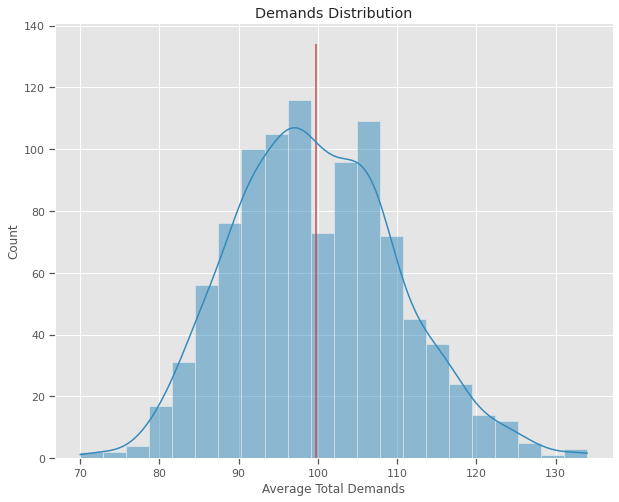

In [15]:
plt.style.use('ggplot')
sns.histplot(data=demands, x='total', kde=True)
plt.vlines(demands['total'].mean(), ymin=0, ymax=demands['total'].max(), color='r')
plt.xlabel('Average Total Demands')
plt.title('Demands Distribution');

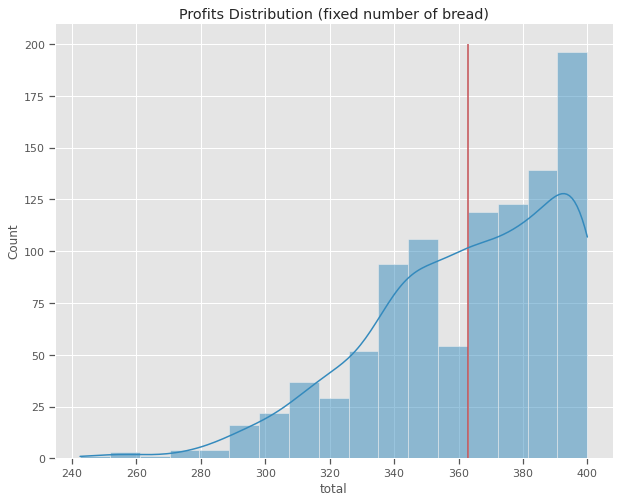

In [16]:
sns.histplot(data=profits, x='total', kde=True)
plt.vlines(profits['total'].mean(), ymin=0, ymax=200, color='r')
plt.title('Profits Distribution (fixed number of bread)');

Based on the demands graph I would say that a good day for demands would be medianroximately the total customers of around 115 customers and up entering the sandwhich shop, while a bad day is around 85-80 customers coming into the shop. I approxiated these numbers based on the visualizations, with a very near normal distribution it's easy to see where the majority of demands lie and how they taper off on either side of the mean.

Now for the profits graph, I would say a good day is about a profit of around 380 or more in profits, while a bad day is around 310 or less in profits. This distribution is NOT nearly normal like the demands distribution, so I am just taking a best guess based on the visualization. This is because in the set up for our simulation we declare that if any customer wants a sandwich with bread that is already out, then they do not get any sandwhich and just leave, and this bears no negative affect on our profits. When making only 100 loafs of bread for the day we see that the mode for the distribution is also the max amount of money in a day, to me this means we need to make more bread.

In the next cell I check these numbers with the actual distribution by taking the means of both distributions and either adding or subtracting two times the standard deviation, leaving us with 'good' and 'bad' days based on the definitions of of mean and standard deviation (theoretically 95% of the data would lie within 2 standard deviations of the mean). However since profit isn't anywhere near normally distributed I wouldn't expect it's results to be very insightful.

In [17]:
good_demands = demands['total'].mean() + (demands['total'].std() * 2)
bad_demands = demands['total'].mean() - (demands['total'].std() * 2)
good_profit = profits['total'].mean() + (profits['total'].std() * 2)
bad_profit = profits['total'].mean() - (profits['total'].std() * 2)

In [18]:
print(f'Based on the stats a good day for demands is about {good_demands} and a bad day is about {bad_demands}')

Based on the stats a good day for demands is about 120.2689610116767 and a bad day is about 79.24503898832332


In [19]:
print(f'Based on the stats a good day for profit is about {good_profit} and a bad day is about {bad_profit}. Notice how a "good day" is not even in the range of outcomes for profits in reality')

Based on the stats a good day for profit is about 422.6850607550954 and a bad day is about 303.1954392449046. Notice how a "good day" is not even in the range of outcomes for profits in reality


So far we assumed that the supply of bread each day is fixed, but we can now loosen that assumption and ask what happens to profit if we increase or decrease the supply of bread, everything else being equal.

- Run `sim_profit` for the different values of `num_breads` as given by `num_breads_iter` shown below (all other arguments stay the same). Calculate the average profit (averaged over all the days) for each case and create a line plot showing number of breads supplied vs total profit. <span style="color:red" float:right>[5 point]</span>

In [22]:
num_days = 1000
arrival_rate = 100
sell_price = 4.00
cost_price = 1.25
num_breads_iter = [60, 80, 100, 120, 140, 160]

profits_avg_list = []

for num in num_breads_iter:
    s, d, p = sim_profit(num, num_days, arrival_rate, sell_price, cost_price)
    p['total'] = p['white'] + p['wheat'] + p['multigrain']
    profits_avg_list.append(p['total'].mean())

big_profits = pd.DataFrame()
big_profits['total_profit_avg'] = profits_avg_list
big_profits['num_breads'] = num_breads_iter

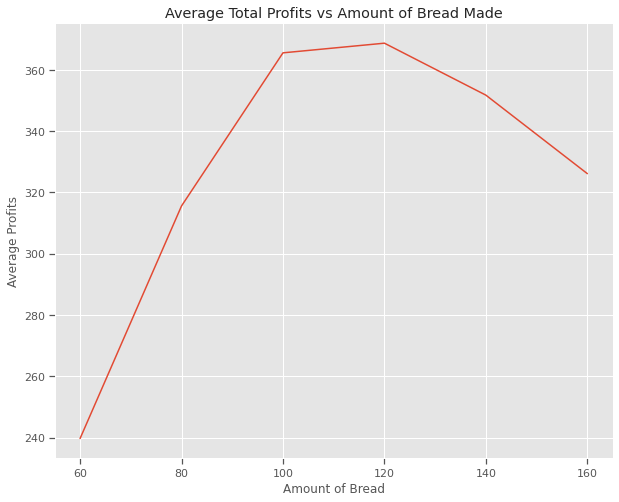

In [23]:
sns.lineplot(data=big_profits, x='num_breads', y='total_profit_avg')
plt.title('Average Total Profits vs Amount of Bread Made')
plt.xlabel('Amount of Bread')
plt.ylabel('Average Profits');

As you can see, once we can simulate daily profit, we can begin to answer many questions and reduce our uncertainty about the business. For this reason, Monte Carlo simulations can be an effective tool for measuring risk and reward.


# End of assignment